This notebook contains the first look at results from scanning over M3, MU3, MQ3 and AU3, as well as the other input params. The input range is:

- $500 < M3 < 2000 $ GeV 

- $500 < MU3, MQ3 < 2500$ GeV

- $500 < AU3 < 3000$ GeV

- $M1$ = 150 GeV, $M2$ = 300 GeV

- $MD3$ = 1 TeV

- $AD3$ = 2.5 TeV

- $\tan \beta \in [1.5, 50]$

- $\mu_{eff} \in [100, 300]\ \mathrm{GeV}$

- $\kappa,\lambda \in [0, 0.7]$

- $A_{\kappa} \in [-30, 2.5]\ \mathrm{GeV}$

- $A_{\lambda} \in [-1000, 4000]\ \mathrm{GeV}$

Note also that:

- All constraints checked against, except we require 1) $\Delta a_{\mu} > 0$ and 2) $\Omega h^2 < 0.131$

- Plots that are labelled 'without experimental constraints' have points that are only required to pass: 
    - $m_h^2 > 1$
    - $m_a^2 >1$
    - $m_{H^\pm}^2 >1$
    - $m_{a_1} < 100\ \mathrm{GeV}$

One point to note: these plots were made using a scan over M3/MU3/MQ3/AU3 only, mainly to investiage their effect via different stop masses. However, in the BML paper, they work in the GMSB scenario, with common scalar and fermion masses, $m_0$ and $m_{1/2}$, respectively. These will affect other mass parameters beside those I scanned over, so for a **complete** comparison, I would need to scan over the massses corresponding to the other handednesses and generations.

All results at $\sqrt{s} = 13\ \mathrm{TeV}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

# to show plots:
get_ipython().magic(u'pylab inline')

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
# mpl.rcParams['ytick.major.width'] = 1
# mpl.rcParams['ytick.minor.width'] = 1
# mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Populating the interactive namespace from numpy and matplotlib


In [2]:
from common_plots import *

In [3]:
# Unpack dataframes from hdf5 binaries
# I4 = 1 dataset, scanning over M3,MU3,MQ3,AU3 
store_M3MU3MQ3AU3_scan = pd.HDFStore("points_I41_scan_M3MU3MQ3AU3.h5")
df_M3MU3MQ3AU3_orig = store_M3MU3MQ3AU3_scan.full12loop_all
df_M3MU3MQ3AU3_pass_all = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly
# df_M3MU3MQ3AU3_ma1Lt10 = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
df_M3MU3MQ3AU3_h1SM = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_M3MU3MQ3AU3_h2SM = store_M3MU3MQ3AU3_scan.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_M3MU3MQ3AU3_scan.close()

In [4]:
len(df_M3MU3MQ3AU3_pass_all.index)

20404

In [5]:
# Unpack dataframes from hdf5 binaries
# I4 = 0 dataset, scanning over M3,MU3,MQ3,AU3
store_M3MU3MQ3AU3_scan_defMass = pd.HDFStore("points_I40_scan_M3MU3MQ3AU3.h5")
df_M3MU3MQ3AU3_defMass_orig = store_M3MU3MQ3AU3_scan_defMass.full12loop_all
df_M3MU3MQ3AU3_defMass_pass_all = store_M3MU3MQ3AU3_scan_defMass.full12loop_good_posMuMagMom_planckUpperOnly
# df_M3MU3MQ3AU3_defMass_ma1Lt10 = store_M3MU3MQ3AU3_scan_defMass.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
df_M3MU3MQ3AU3_defMass_h1SM = store_M3MU3MQ3AU3_scan_defMass.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_M3MU3MQ3AU3_defMass_h2SM = store_M3MU3MQ3AU3_scan_defMass.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_M3MU3MQ3AU3_scan_defMass.close()

In [6]:
len(df_M3MU3MQ3AU3_defMass_pass_all.index)

7568

In [14]:
# Default (M3 = MQ3 = MU3 = 1TeV, AU3 = AD3 = AE3 = 2.5 TeV)
store = pd.HDFStore("points_I4_1.h5")
df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly
# df_ma1Lt10 = store.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
df_h1SM = store.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_h2SM = store.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store.close()

In [15]:
len(df_pass_all.index)

19038

# Initial look

Since this is the first time scanning over a range of M3, etc, it is wise to check that the range of the other input parametes ($\tan\beta$ etc) are still sensible. Below are histograms of their distributions, and scatter plots against $m_{a_1}$, to make sure we are not excluding low mass $a_1$. (Note that these plots look almost identical for I4 = 0). We look at the distributions with and without experimental constraints.

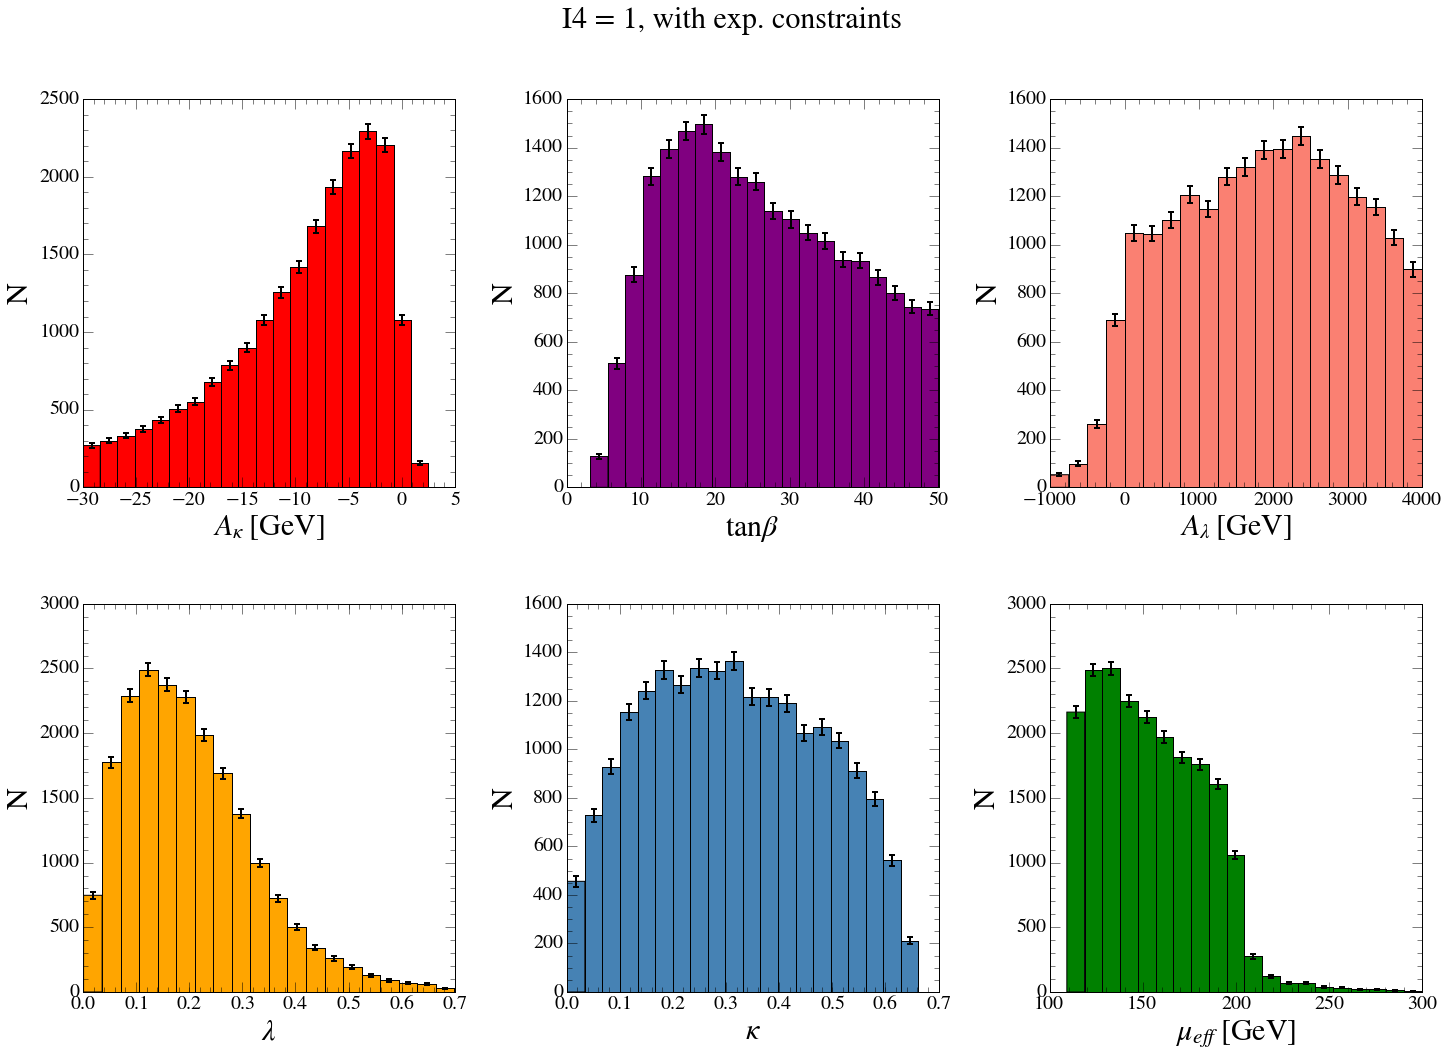

In [7]:
plot_input_params_hists(df_M3MU3MQ3AU3_pass_all, ylabel="N", title="I4 = 1, with exp. constraints", 
                        errorbars=True, bins=20)

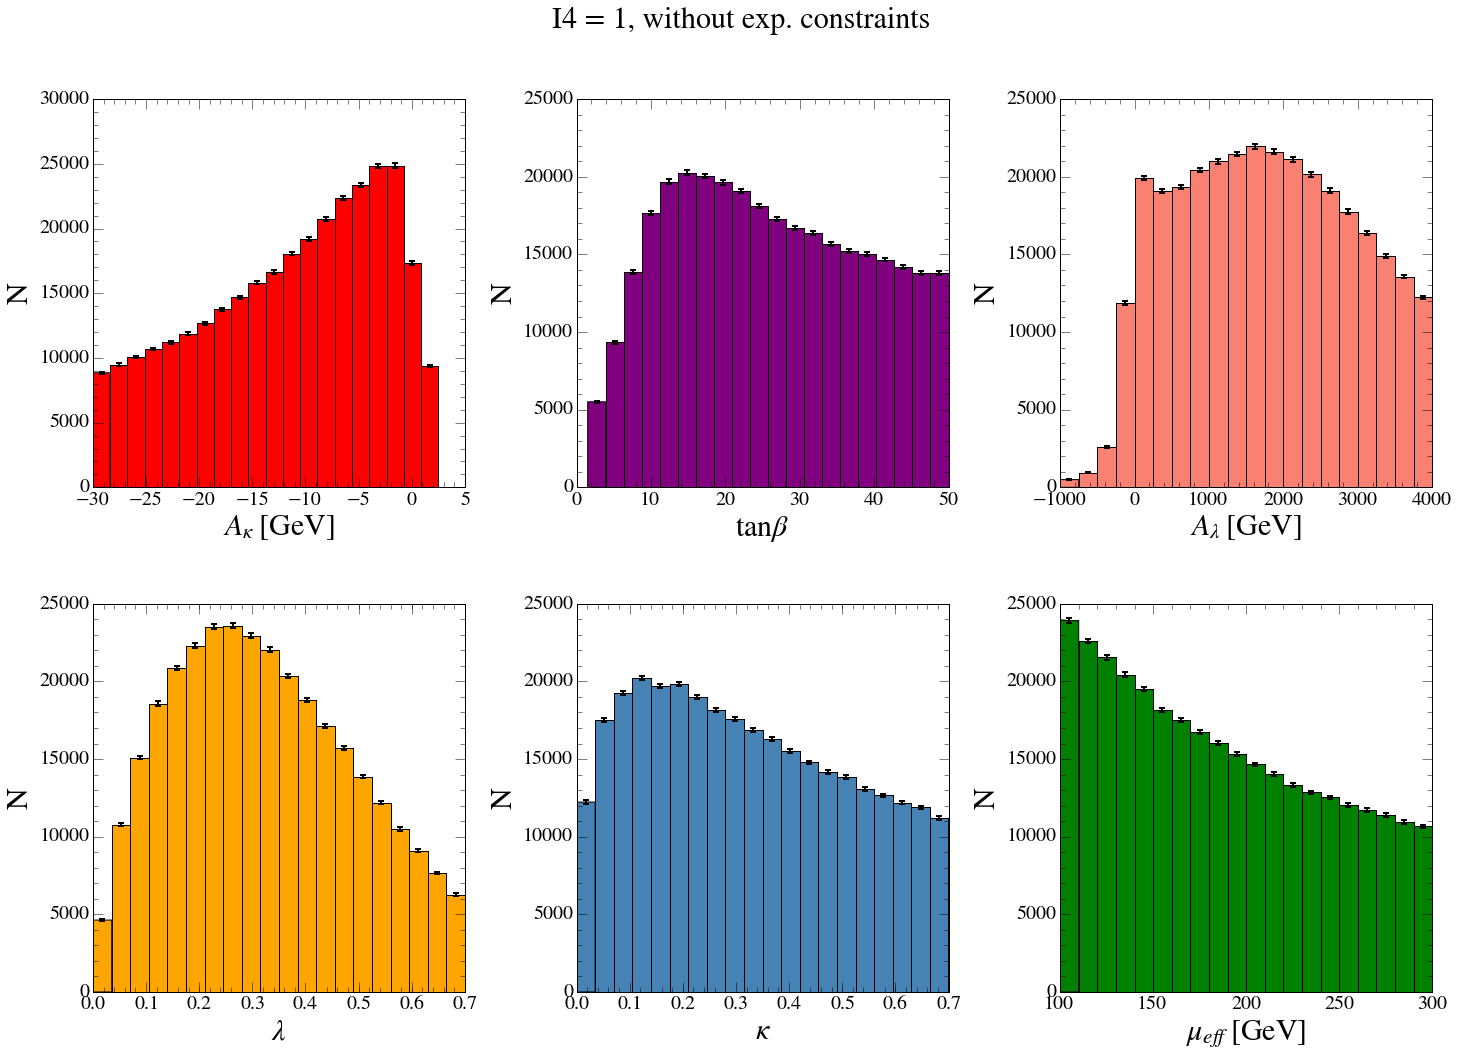

In [8]:
plot_input_params_hists(df_M3MU3MQ3AU3_orig, ylabel="N", title="I4 = 1, without exp. constraints", 
                        errorbars=True, bins=20)

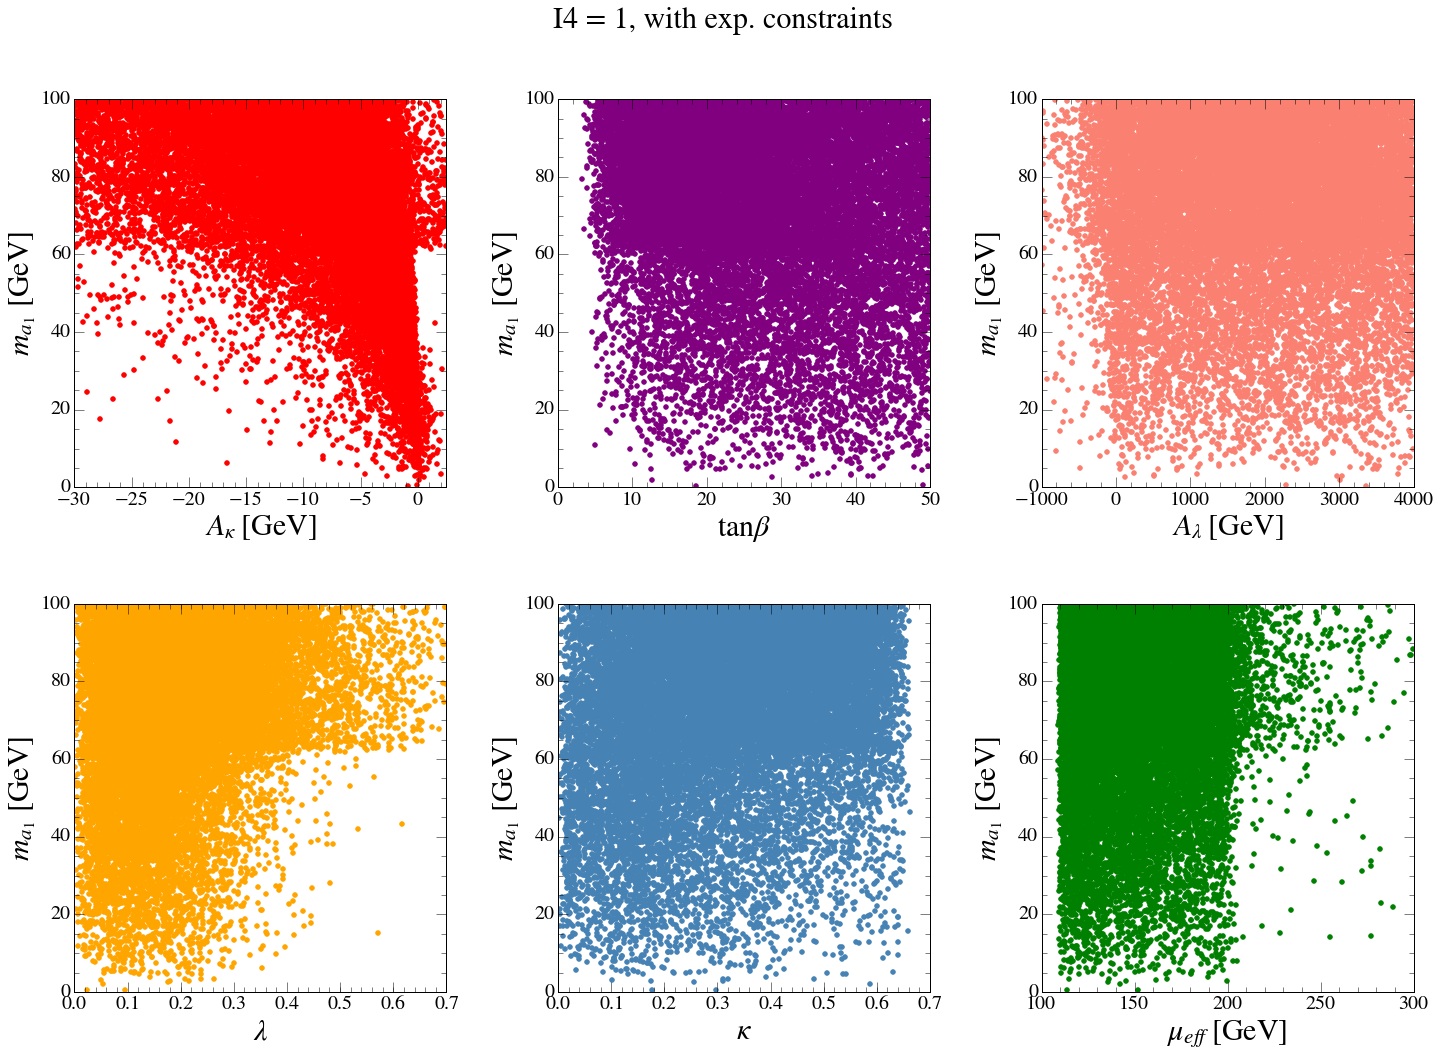

In [9]:
plot_input_params_scatters(df_M3MU3MQ3AU3_pass_all, yvar="ma1", 
                           ylabel=r"$m_{a_1}\ \mathrm{[GeV]}$", 
                           yrange=[0, 100], title="I4 = 1, with exp. constraints")

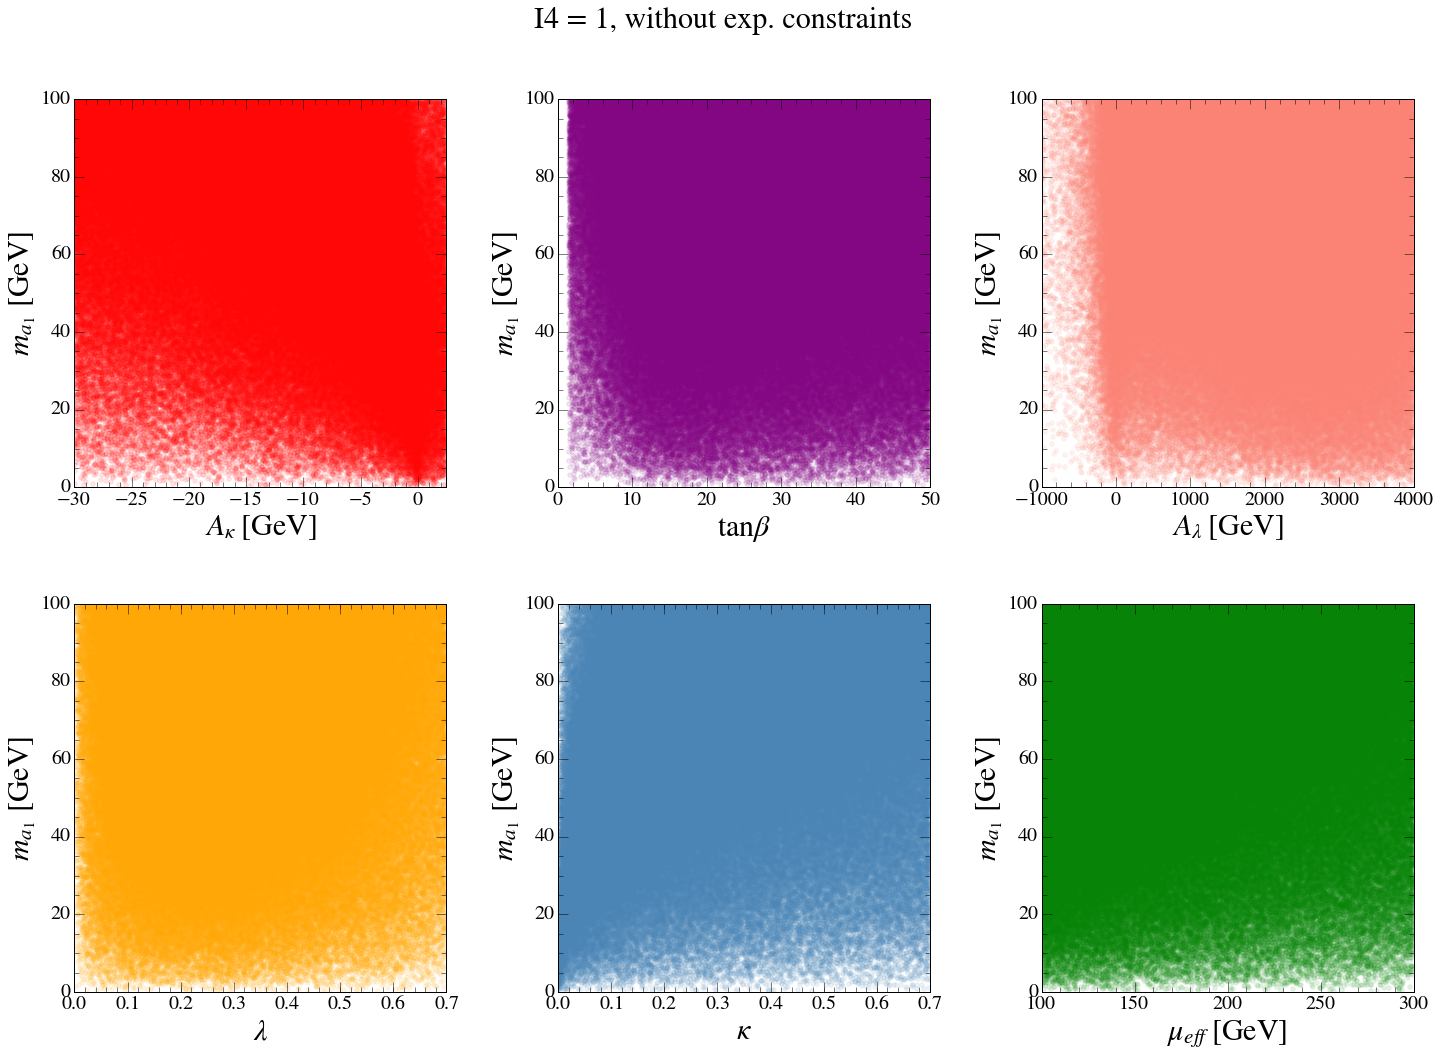

In [10]:
plot_input_params_scatters(df_M3MU3MQ3AU3_orig, yvar="ma1", 
                           ylabel=r"$m_{a_1}\ \mathrm{[GeV]}$", 
                           yrange=[0, 100], title="I4 = 1, without exp. constraints", alpha=0.1)

Note that for low mass $a_1$, it may be worth extending the range of $A_{\lambda}$ and $A_{\kappa}$

Let's plot some distributions that may be interesting, given that we now scan over M3, etc.

In [11]:
dfs_pass = [df_M3MU3MQ3AU3_pass_all, df_M3MU3MQ3AU3_defMass_pass_all]
labels_pass = ['I4 = 1', 'I4 = 0']
colors_pass = ['green', 'blue']

In [12]:
dfs_with_without_con = [df_M3MU3MQ3AU3_pass_all, df_M3MU3MQ3AU3_orig]
labels_with_without_con = ["With exp. constraints", "Without exp. constraints"]
colours_with_without_con = ['green', 'darkorchid']
title_with_without_con = "With and without exp. constraints (I4 = 1)"

In [13]:
dfs_with_without_con_defMass = [df_M3MU3MQ3AU3_defMass_pass_all, df_M3MU3MQ3AU3_defMass_orig]
title_with_without_con_defMass = "With and without exp. constraints (I4 = 0)"

(0.0, 0.08)

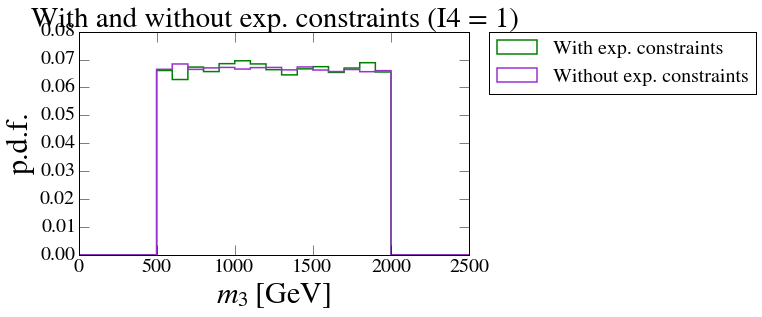

In [14]:
plot_many_hists_compare("m3", dfs_with_without_con,
                        title_with_without_con, labels_with_without_con, 
                        r"$m_{3}\ \mathrm{[GeV]}$", "p.d.f.", colours_with_without_con, normed=True,
                        range=[0,2500], bins=25, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.gcf().get_axes()[0].set_ylim(top=0.08)

(0.0, 0.08)

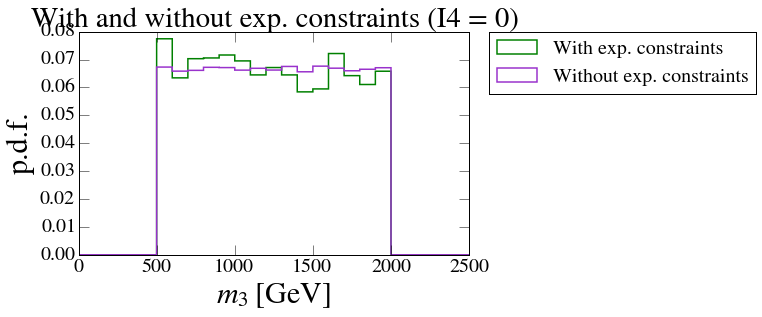

In [15]:
plot_many_hists_compare("m3", dfs_with_without_con_defMass,
                        title_with_without_con_defMass, labels_with_without_con, 
                        r"$m_{3}\ \mathrm{[GeV]}$", "p.d.f.", colours_with_without_con, normed=True,
                        range=[0,2500], bins=25, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.gcf().get_axes()[0].set_ylim(top=0.08)

(0.0, 0.08)

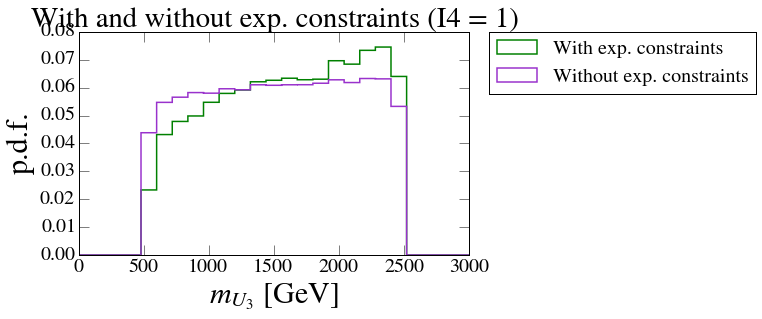

In [16]:
plot_many_hists_compare("mu3", dfs_with_without_con,
                        title_with_without_con, labels_with_without_con, 
                        r"$m_{U_3}\ \mathrm{[GeV]}$", "p.d.f.", colours_with_without_con, normed=True,
                        range=[0,3000], bins=25, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.gcf().get_axes()[0].set_ylim(top=0.08)

(0.0, 0.08)

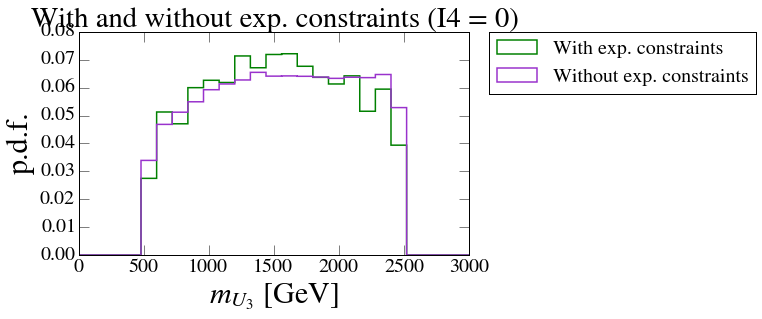

In [17]:
plot_many_hists_compare("mu3", dfs_with_without_con_defMass,
                        title_with_without_con_defMass, labels_with_without_con, 
                        r"$m_{U_3}\ \mathrm{[GeV]}$", "p.d.f.", colours_with_without_con, normed=True,
                        range=[0,3000], bins=25, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.gcf().get_axes()[0].set_ylim(top=0.08)

(0.0, 0.09)

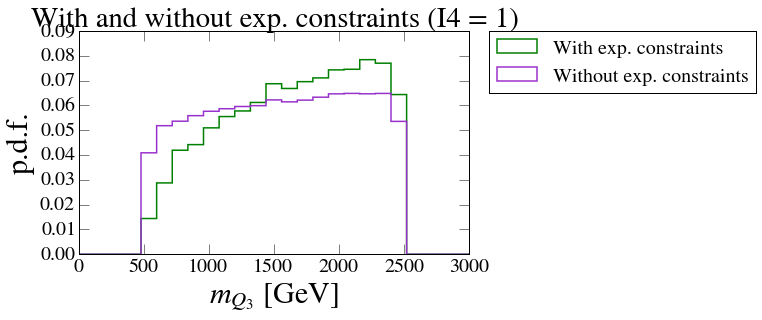

In [18]:
plot_many_hists_compare("mq3", dfs_with_without_con,
                        title_with_without_con, labels_with_without_con, 
                        r"$m_{Q_3}\ \mathrm{[GeV]}$", "p.d.f.", colours_with_without_con, normed=True,
                        range=[0,3000], bins=25, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.gcf().get_axes()[0].set_ylim(top=0.09)

(0.0, 0.09)

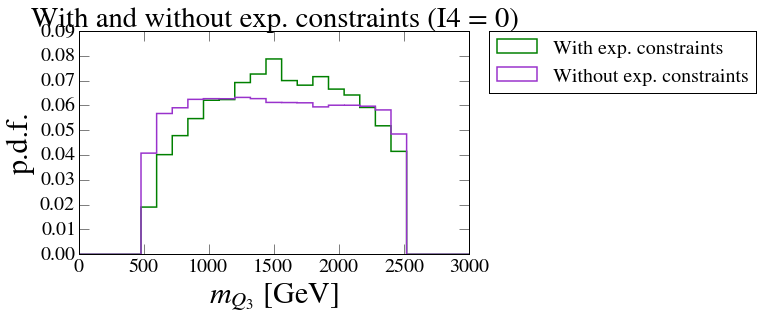

In [19]:
plot_many_hists_compare("mq3", dfs_with_without_con_defMass,
                        title_with_without_con_defMass, labels_with_without_con, 
                        r"$m_{Q_3}\ \mathrm{[GeV]}$", "p.d.f.", colours_with_without_con, normed=True,
                        range=[0,3000], bins=25, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.gcf().get_axes()[0].set_ylim(top=0.09)

(0.0, 0.12)

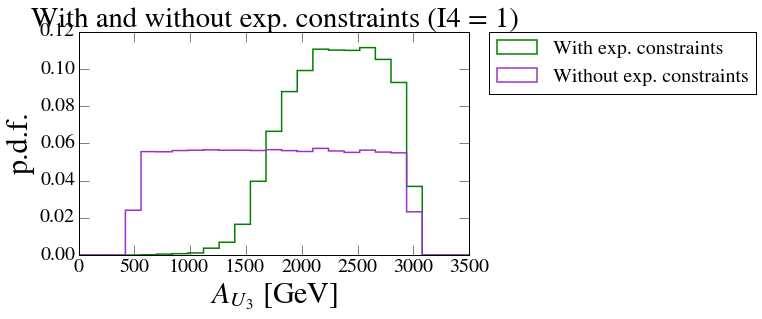

In [20]:
plot_many_hists_compare("au3", dfs_with_without_con,
                        title_with_without_con, labels_with_without_con, 
                        r"$A_{U_3}\ \mathrm{[GeV]}$", "p.d.f.", colours_with_without_con, normed=True,
                        range=[0,3500], bins=25, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.gcf().get_axes()[0].set_ylim(top=0.12)

(0.0, 0.2)

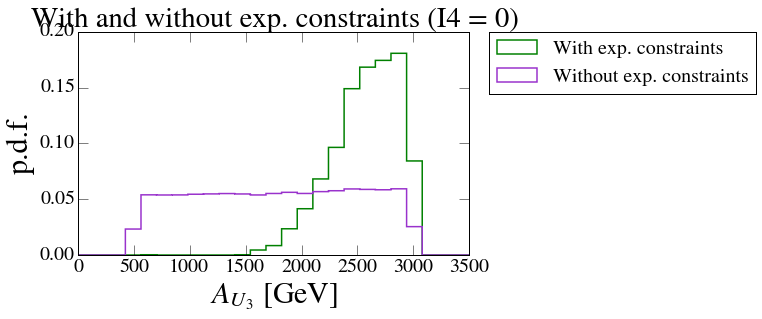

In [21]:
plot_many_hists_compare("au3", dfs_with_without_con_defMass,
                        title_with_without_con_defMass, labels_with_without_con, 
                        r"$A_{U_3}\ \mathrm{[GeV]}$", "p.d.f.", colours_with_without_con, normed=True,
                        range=[0,3500], bins=25, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.gcf().get_axes()[0].set_ylim(top=0.2)

So we can draw some immediate conclusions about the range of parameters spcae for M3, MU3, MQ3, AU3:

- The range of M3 is largely unaffected by the experimental constraints, for both I4 scenarios

- For I4 = 1, the range of MU3 and MQ3 is slightly affected, with smaller values ($\sim$ 1 Tev - 1.5 TeV) faililng experimental constraints more often than larger values

- For I4 = 0, the range of MU3 and MQ3 is slightly affected, with intermediate values ($\sim$ 1.5 TeV) preferentially passing experimental constraints 

- AU3 is heavily affected by the experimental constraints - in I4 = 1, parameters points with $ AU3 < 1.75$ TeV have a very small chance of surviving experimental constraints, whilst for I4 = 0 that limit increases, to 2 TeV.

##  Stop masses

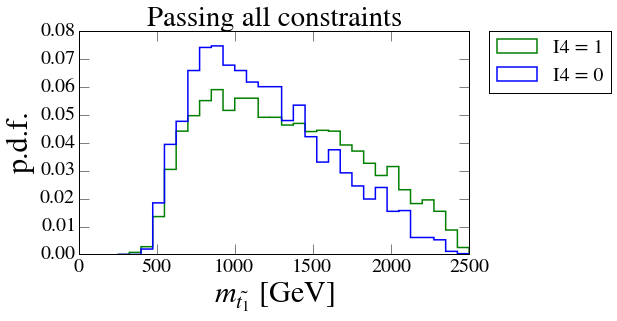

In [15]:
plot_many_hists_compare("mstop1", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$m_{\tilde{t_1}}\ \mathrm{[GeV]}$", "p.d.f.", colors_pass, normed=True,
                        range=[250,2500], bins=30, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

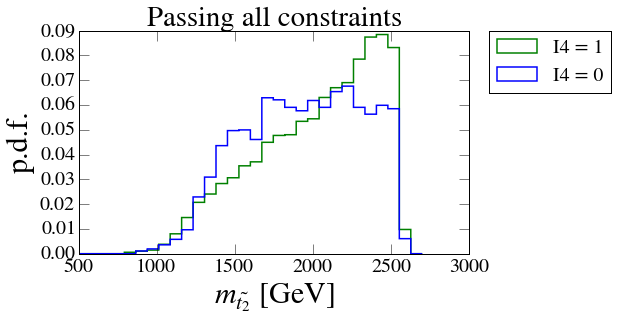

In [16]:
plot_many_hists_compare("mstop2", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$m_{\tilde{t_2}}\ \mathrm{[GeV]}$", "p.d.f.", colors_pass, normed=True,
                        range=[500, 2700], bins=30, histtype="step", linewidth=1.5)
plt.ylim(top=0.09)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

##Sbottom masses 

Note that we don't expect a huge variation here, since we only changed the up-type masses, and kept their down-type counterparts constant.

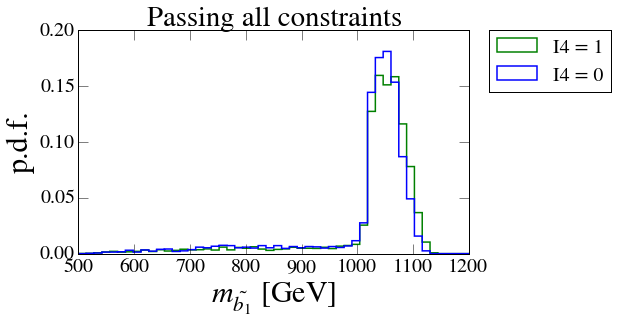

In [17]:
plot_many_hists_compare("msbottom1", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$m_{\tilde{b_1}}\ \mathrm{[GeV]}$", "p.d.f.", colors_pass, normed=True,
                        range=[500, 1200], bins=50, histtype="step", linewidth=1.5)
# plt.ylim(top=0.0014)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

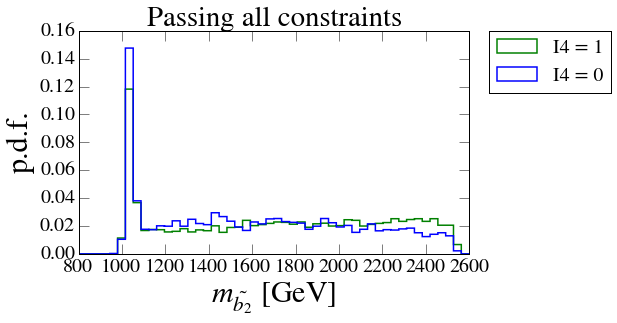

In [19]:
plot_many_hists_compare("msbottom2", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$m_{\tilde{b_2}}\ \mathrm{[GeV]}$", "p.d.f.", colors_pass, normed=True,
                        range=[800, 2600], bins=50, histtype="step", linewidth=1.5)
# plt.ylim(top=0.0014)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

## Higgs masses

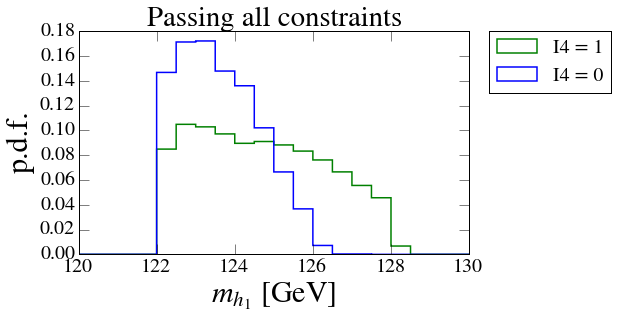

In [20]:
plot_many_hists_compare("mh1", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$m_{h_1}\ \mathrm{[GeV]}$", "p.d.f.", colors_pass, normed=True,
                        range=[120,130], bins=20, histtype="step", linewidth=1.5,log=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

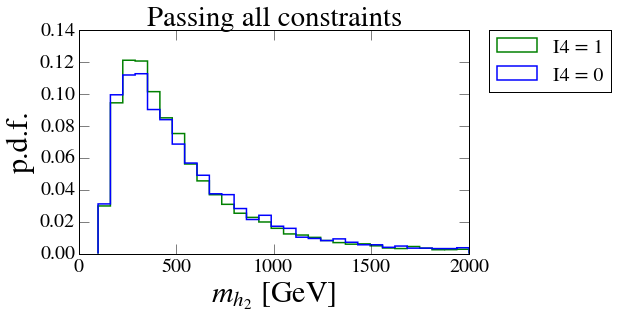

In [24]:
plot_many_hists_compare("mh2", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$m_{h_2}\ \mathrm{[GeV]}$", "p.d.f.", colors_pass, normed=True,
                        range=[100,2000], bins=30, histtype="step", linewidth=1.5, log=False)
plt.ylim(top=0.14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

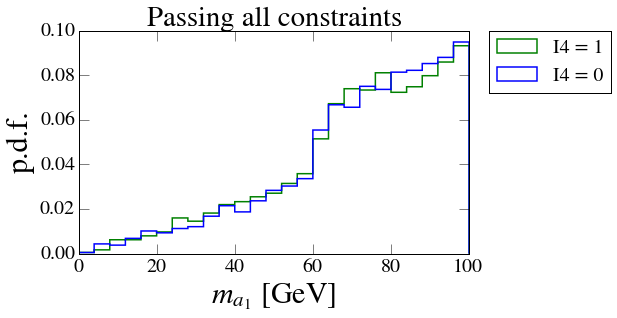

In [22]:
plot_many_hists_compare("ma1", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$m_{a_1}\ \mathrm{[GeV]}$", "p.d.f.", colors_pass, normed=True,
                        range=[0,100], bins=25, histtype="step", linewidth=1.5, log=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

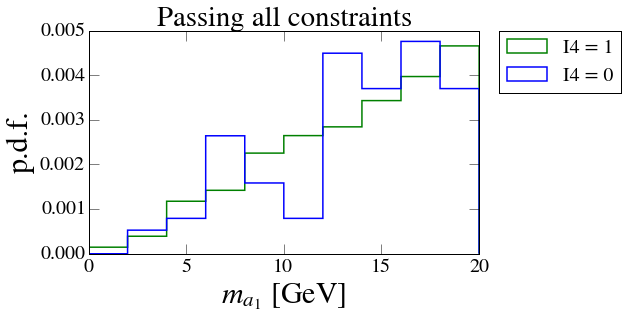

In [25]:
plot_many_hists_compare("ma1", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$m_{a_1}\ \mathrm{[GeV]}$", "p.d.f.", colors_pass, normed=True,
                        range=[0,20], bins=10, histtype="step", linewidth=1.5, log=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

Unfortunately, there are few events in this region, so the results are statistically limited. However, there does not appear to be a big difference in distribution shapes.

# Replicating BML plot 

For reference, from the paper:

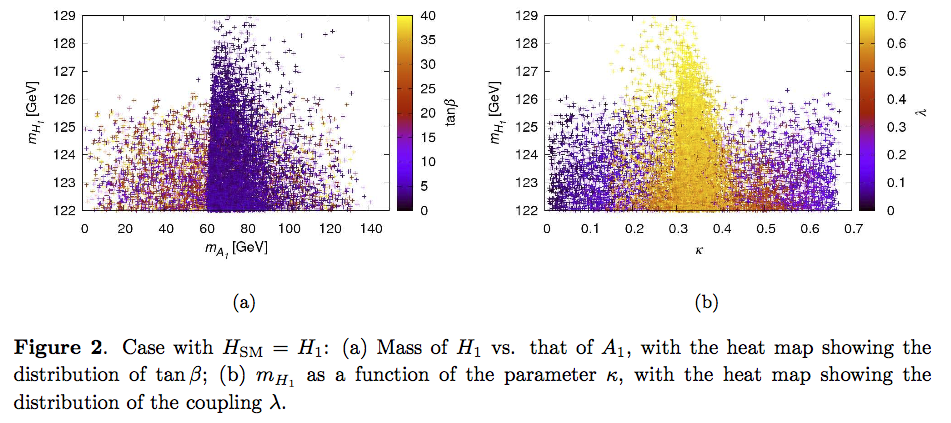

In [78]:
from IPython.display import Image

fig = Image(filename=('figures/bm_fig2.png'))
fig

Now replicating with my datasets, including scanning over M3, MU3, MQ3, AU3. LH plots: z-axis is $\tan \beta$. RH plots: z-axis is $\lambda$

(<matplotlib.figure.Figure at 0x10ebea550>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1395d4bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e711a10>], dtype=object))

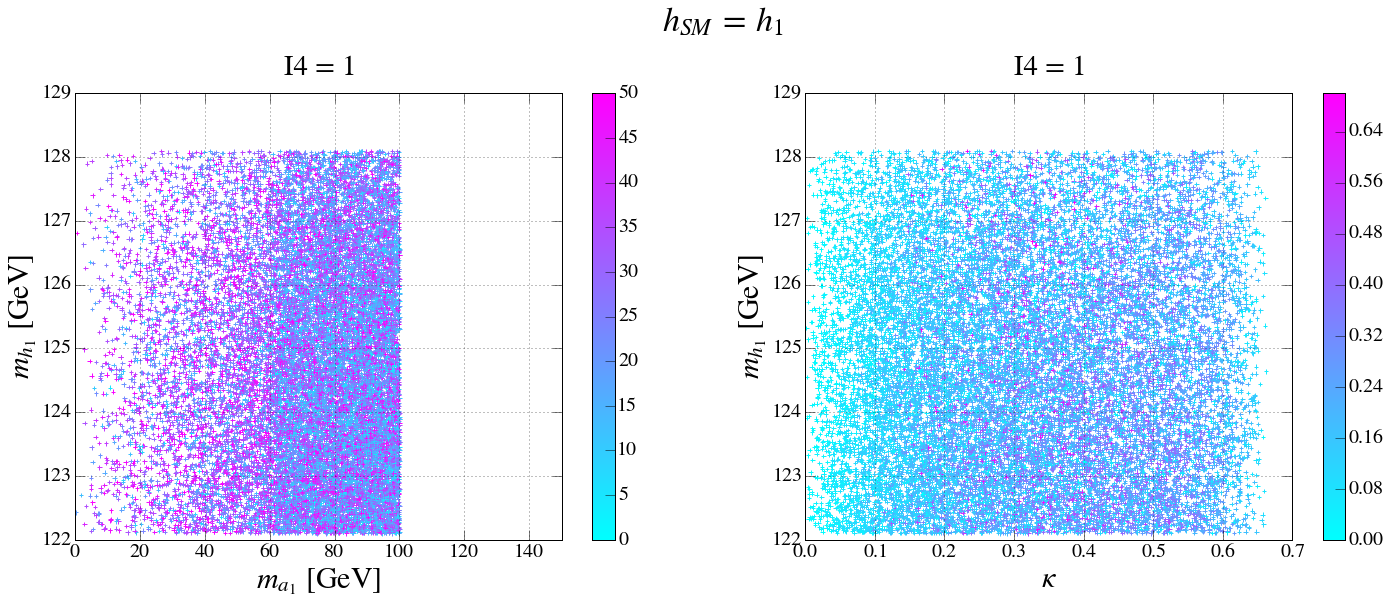

In [26]:
paper_compare_plot1(df_M3MU3MQ3AU3_h1SM, "I4 = 1")

(<matplotlib.figure.Figure at 0x12e2a6d10>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ce91990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e2a13d0>], dtype=object))

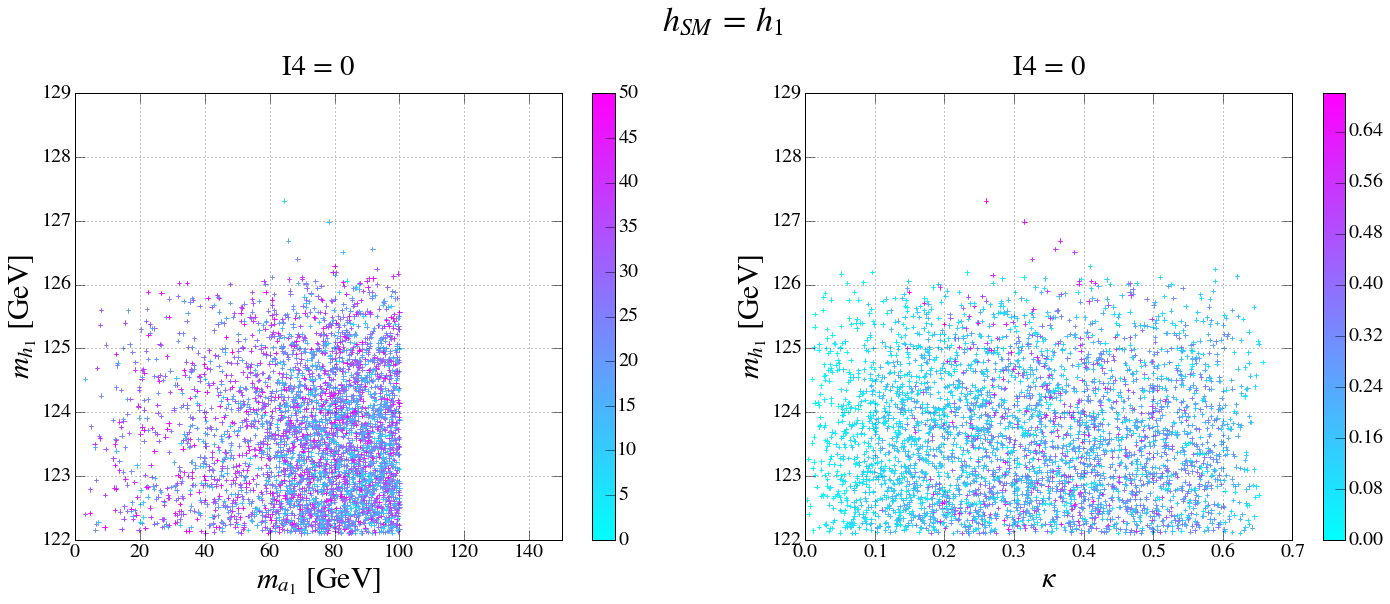

In [90]:
paper_compare_plot1(df_M3MU3MQ3AU3_defMass_h1SM, "I4 = 0")

So we can clearly see that there is still a marked difference between the I4 = 1 and I4 = 0 scenarios. However, we no longer have the sharp 'edge' in the I4 = 0 scenario that was previously seen, although there does seem to be a cutoff ~ 126 GeV, depending on $\tan \beta$ and $\lambda$.

In the I4 = 1 case, we case easily achieve a Higgs mass of 125 GeV, at various values of $\tan \beta, \kappa, \lambda$.

# Looking at $gg \to h(125) \to 2a_1/h_1 \to 4\tau$ at $\sqrt{s} = 13\ \mathrm{TeV}$

Let's deconstruct the total cross-section to look at the individual components in detail. Note, there are no constraints on $m_{a_1}$ in these plots

## $\sigma(ggh)$

First, let's look at the gluon-gluon-higgs cross-section. instead of the absolute cross-section, we consider the reduced coupling - i.e. relative to the the SM ggh coupling. We'll look at $h_1$ first, then $h_2$

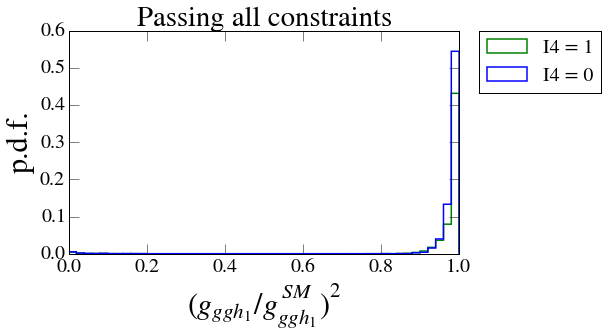

In [27]:
plot_many_hists_compare("h1ggrc2", dfs_pass,
#                         [df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<10], df_M3MU3MQ3AU3_defMass_pass_all[df_M3MU3MQ3AU3_defMass_pass_all.ma1<10]],
                        "Passing all constraints", labels_pass, 
                        r"$(g_{ggh_1}/g_{ggh_1}^{SM})^2$", "p.d.f.", colors_pass, normed=True,
                        range=[0,1], bins=50, histtype="step", linewidth=1.5, log=False)
ax = plt.gcf().get_axes()[0]
# ax.set_xscale('log')§
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

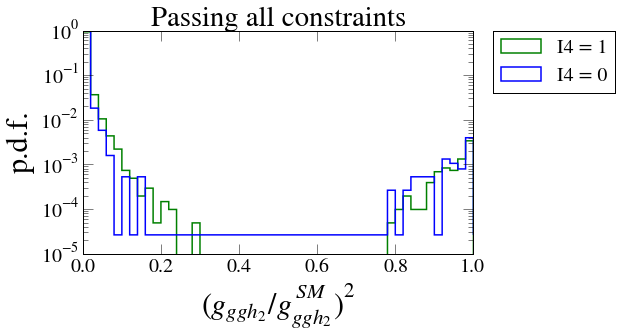

In [28]:
plot_many_hists_compare("h2ggrc2", dfs_pass,
#                         [df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<10], df_M3MU3MQ3AU3_defMass_pass_all[df_M3MU3MQ3AU3_defMass_pass_all.ma1<10]],
                        "Passing all constraints", labels_pass, 
                        r"$(g_{ggh_2}/g_{ggh_2}^{SM})^2$", "p.d.f.", colors_pass, normed=True,
                        range=[0,1], bins=50, histtype="step", linewidth=1.5, log=True)
ax = plt.gcf().get_axes()[0]
# ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

There are 2 regimes here - when the coupling is either heavily supressed, or when it is almost SM like. This corresponds to when $h_2$ is not $h(125)$, and when it is, respectively:

In [29]:
# for when we comapre h1 = h(125) and h2= h(125)
df_M3MU3MQ3AU3_h2SM = df_M3MU3MQ3AU3_pass_all[(df_M3MU3MQ3AU3_pass_all.mh2<128.1)&(df_M3MU3MQ3AU3_pass_all.mh2>122.1)]
df_h = [df_M3MU3MQ3AU3_h1SM, df_M3MU3MQ3AU3_h2SM]
colors_h = ["red", "purple"]
labels_h = [r"$h_1 = h(125)$", r"$h_2 = h(125)$"]

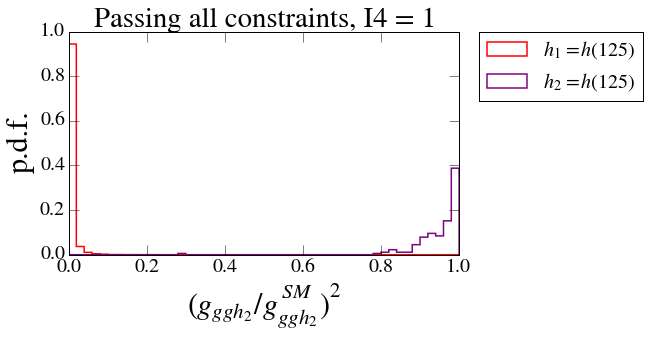

In [30]:
plot_many_hists_compare("h2ggrc2", 
                        df_h,
                        "Passing all constraints, I4 = 1", labels_h, 
                        r"$(g_{ggh_2}/g_{ggh_2}^{SM})^2$", "p.d.f.", colors_h, normed=True,
                        range=[0,1], bins=50, histtype="step", linewidth=1.5, log=False)
ax = plt.gcf().get_axes()[0]
# ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

## $BR(h_i\to a/h_j)$

Now let us consider the BR for the first higgs decaying into a pair of CP-odd or CP-even higgses.

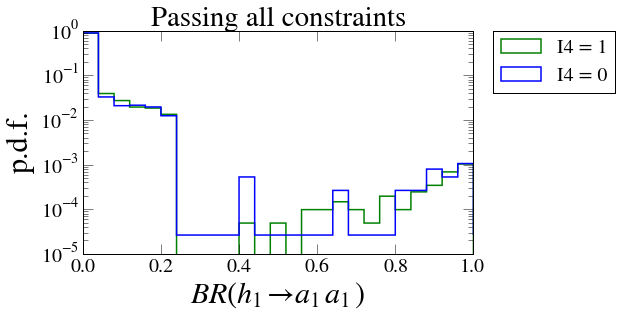

In [31]:
plot_many_hists_compare("Brh1a1a1", dfs_pass,
                        "Passing all constraints", labels_pass, 
                        r"$BR(h_1\to a_1a_1)$", "p.d.f.", colors_pass, normed=True,
                        range=[0,1], bins=25, histtype="step", linewidth=1.5, log=True)
ax = plt.gcf().get_axes()[0]
# ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

We see two distinct regions here - when the BR is either very small, or when it is large ($\sim0.9$). This is due to when $h_1$ is and is not $h_{125}$ - in the former scenario, the BR must be kept small, to avoid decreasing the rate of the $ZZ/bb/\gamma \gamma$ channels, which must agree with experimental measures. However, in the latter scenario, we are no longer constrained by those rates, and can have much larger BRs. (Note that in the plot, the scenario with $h_2 = h(125)$ is rather stats-limited - hope to improve.

From now on, we choose to compare the two h(125) scenarios, isntead of the two I4 scenarios, since the latter provides no difference.

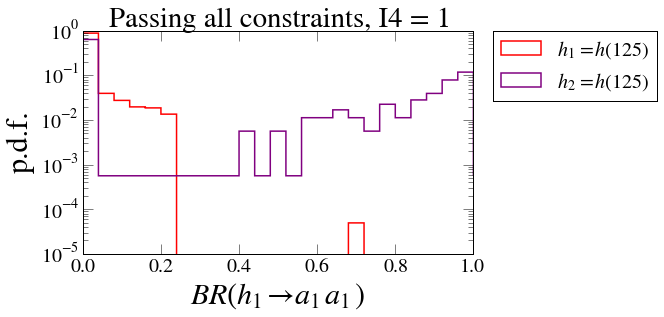

In [32]:
plot_many_hists_compare("Brh1a1a1", 
                        df_h,
                        "Passing all constraints, I4 = 1", labels_h, 
                        r"$BR(h_1\to a_1a_1)$", "p.d.f.", colors_h, normed=True,
                        range=[0,1], bins=25, histtype="step", linewidth=1.5, log=True)
ax = plt.gcf().get_axes()[0]
# ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

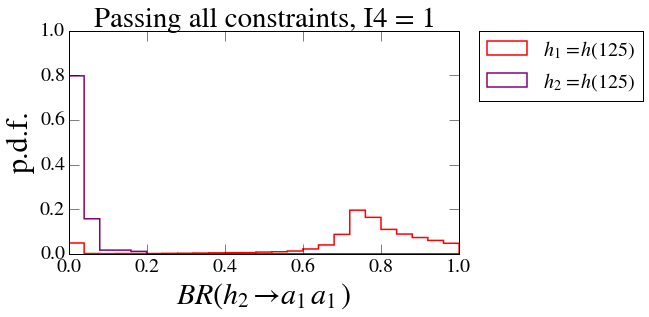

In [37]:
plot_many_hists_compare("Brh2a1a1", df_h,
                        "Passing all constraints, I4 = 1", labels_h, 
                        r"$BR(h_2\to a_1a_1)$", "p.d.f.", colors_h, normed=True,
                        range=[0,1], bins=25, histtype="step", linewidth=1.5, log=False)
# plt.gcf().get_axes()[0].set_ylim(top=0.8)
plt.ylim(top=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

Noticeably, there is a distinct peak in the scenario where $h_1 = h(125)$. Note that this is not correlated with $m_{a_1}$ - at all masses of $a_1$ you see this behaviour, with points at very low BR, and then points at around 0.7:

(0, 100)

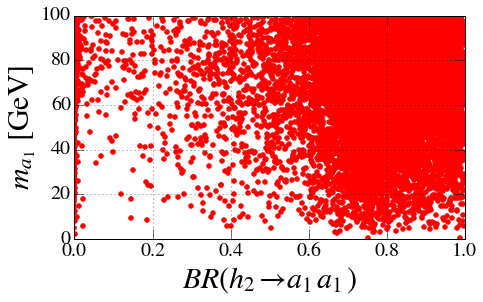

In [34]:
df_M3MU3MQ3AU3_h1SM.plot(kind='scatter', x='Brh2a1a1', y='ma1', color='red')
plt.xlabel(r'$BR(h_2 \to a_1a_1)$')
plt.xlim([0, 1])
plt.ylabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
plt.ylim([0, 100])

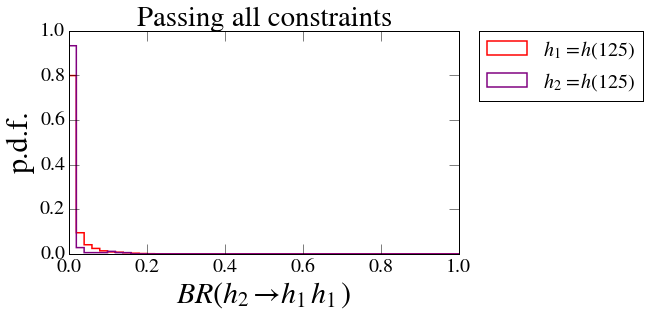

In [42]:
plot_many_hists_compare("Brh2h1h1", df_h,
                        "Passing all constraints", labels_h, 
                        r"$BR(h_2\to h_1h_1)$", "p.d.f.", colors_h, normed=True,
                        range=[0,1], bins=50, histtype="step", linewidth=1.5, log=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

## $BR(h/a \to \tau\tau)$

Lastly, we consider the decay of the lightest CP-odd or CP-even higgs into a pair of taus.

(Ignore the purple line across - plotting artefact)

(0.0001, 1)

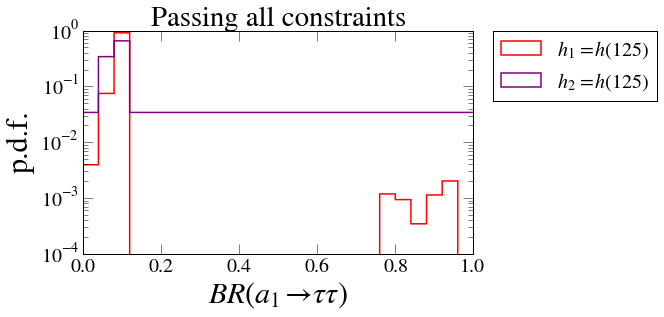

In [43]:
plot_many_hists_compare("Bra1tautau", df_h,
                        "Passing all constraints", labels_h, 
                        r"$BR(a_1\to \tau\tau)$", "p.d.f.", colors_h, normed=True,
                        range=[0,1], bins=25, histtype="step", linewidth=1.5, log=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.ylim([0.0001, 1])

Oddly, whilst a large BR is possible for $h_1 = h(125)$, it is not possible when $h_2 = h(125)$. Is this a low stats issue? 

Let's look at $BR(a_1 \to \tau\tau)$ in more detail, this time as a function of $m_{a_1}$.

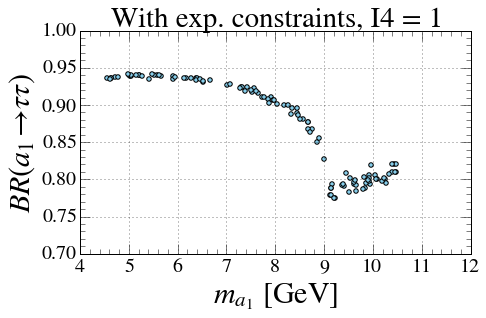

In [44]:
ax = df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<12].plot(kind='scatter', x='ma1', y='Bra1tautau', c='skyblue')
# df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<12].plot(kind='scatter', x='ma1', y='Bra1gg', c='red', ax=ax)
plt.xlim([4,12])
plt.xlabel(r"$m_{a_1}\ \mathrm{[GeV]}$")
plt.ylim(0.7,1)
# plt.ylim(0,1)
plt.ylabel(r"$BR(a_1\to\tau\tau)$")
plt.title("With exp. constraints, I4 = 1")
plt.minorticks_on()

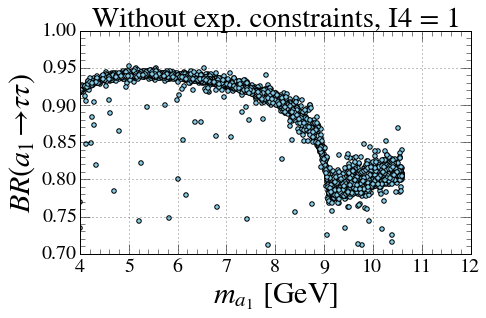

In [45]:
ax = df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.ma1<12].plot(kind='scatter', x='ma1', y='Bra1tautau', c='skyblue')
plt.xlim([4,12])
plt.xlabel(r"$m_{a_1}\ \mathrm{[GeV]}$")
plt.ylim(0.7,1)
plt.ylabel(r"$BR(a_1\to\tau\tau)$")
plt.title("Without exp. constraints, I4 = 1")
plt.minorticks_on()

We still see this odd 'lump' at $BR \sim 0.8$ for $m_{a_1} \sim 9 - 10$ GeV. Note, there are only 60 points here, so bit stat limited. However even without experimental constraints, we still see the same shape, indicating that the cause of this is **not** due to an experimental constraint.

Let's see how the other BRs respond in this region:

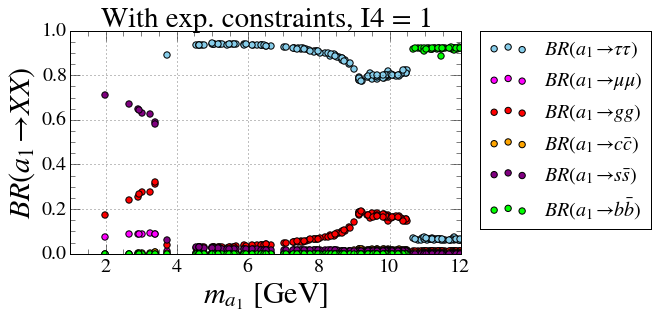

In [75]:
ax = df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<12].plot(kind='scatter', x='ma1', y='Bra1tautau', 
                                                                  c='skyblue', label=r"$BR(a_1\to\tau\tau)$", s=40)
df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<12].plot(kind='scatter', x='ma1', y='Bra1mumu', 
                                                             c='magenta', ax=ax, label=r"$BR(a_1\to \mu\mu)$", s=40)
df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<12].plot(kind='scatter', x='ma1', y='Bra1gg', 
                                                             c='red', ax=ax, label=r"$BR(a_1\to gg)$", s=40)
df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<12].plot(kind='scatter', x='ma1', y='Bra1cc', 
                                                             c='orange', ax=ax, label=r"$BR(a_1\to c\bar{c})$", s=40)
df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<12].plot(kind='scatter', x='ma1', y='Bra1ss', 
                                                             c='purple', ax=ax, label=r"$BR(a_1\to s\bar{s})$", s=40)
df_M3MU3MQ3AU3_pass_all[df_M3MU3MQ3AU3_pass_all.ma1<12].plot(kind='scatter', x='ma1', y='Bra1bb', 
                                                             c='lime', ax=ax, label=r"$BR(a_1\to b\bar{b})$", s=40)

fig = plt.gcf()
fig.set_size_inches(7,4)
plt.xlim([1,12])
plt.xlabel(r"$m_{a_1}\ \mathrm{[GeV]}$")
# plt.ylim(0.7,1)
plt.ylim(0,1)
plt.ylabel(r"$BR(a_1\to XX)$")
plt.title("With exp. constraints, I4 = 1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.minorticks_on()

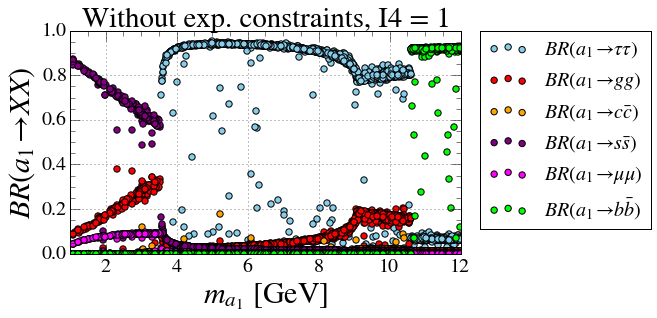

In [92]:
ax = df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.ma1<12].plot(kind='scatter', x='ma1', y='Bra1tautau', 
                                                                  c='skyblue', label=r"$BR(a_1\to\tau\tau)$", s=40)
df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.ma1<12].plot(kind='scatter', x='ma1', y='Bra1gg', 
                                                             c='red', ax=ax, label=r"$BR(a_1\to gg)$", s=40)
df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.ma1<12].plot(kind='scatter', x='ma1', y='Bra1cc', 
                                                             c='orange', ax=ax, label=r"$BR(a_1\to c\bar{c})$", s=40)
df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.ma1<12].plot(kind='scatter', x='ma1', y='Bra1ss', 
                                                             c='purple', ax=ax, label=r"$BR(a_1\to s\bar{s})$", s=40)
df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.ma1<12].plot(kind='scatter', x='ma1', y='Bra1mumu', 
                                                             c='magenta', ax=ax, label=r"$BR(a_1\to \mu\mu)$", s=40)
df_M3MU3MQ3AU3_orig[df_M3MU3MQ3AU3_orig.ma1<12].plot(kind='scatter', x='ma1', y='Bra1bb', 
                                                             c='lime', ax=ax, label=r"$BR(a_1\to b\bar{b})$", s=40)

plt.xlim([1,12])
plt.xlabel(r"$m_{a_1}\ \mathrm{[GeV]}$")
# plt.ylim(0.7,1)
plt.ylim(0,1)
plt.ylabel(r"$BR(a_1\to XX)$")
plt.title("Without exp. constraints, I4 = 1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.minorticks_on()

Interestingly, the gluon-gluon BR shape is a mirror image of the tau-tau BR shape (in and around the lump region)

Let's look at the reduced coupling instead.

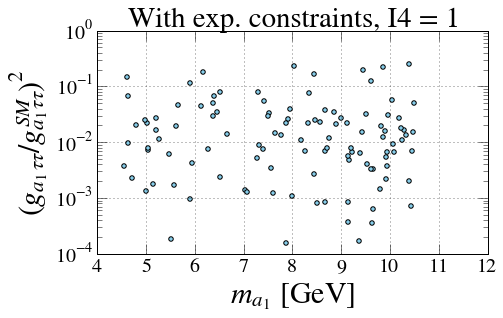

In [47]:
df_M3MU3MQ3AU3_pass_all[(df_M3MU3MQ3AU3_pass_all.ma1<12) & (df_M3MU3MQ3AU3_pass_all.Bra1tautau>0.7)].plot(kind='scatter', x='ma1', y='a1tautaurc2', c='skyblue')
plt.xlim([4,12])
plt.xlabel(r"$m_{a_1}\ \mathrm{[GeV]}$")
plt.ylim(0.0001,1)
plt.yscale('log')
plt.ylabel(r"$(g_{a_1\tau\tau}/g_{a_1\tau\tau}^{SM})^2$")
plt.title("With exp. constraints, I4 = 1")

So there isn't anything odd going on in the reduced coupling.

## Thoughts

So we can see that, in general:

- $\sigma (ggh_1) \simeq \sigma(ggh)_{SM} \sim 44\ \mathrm{pb}$ at 13 TeV

- $\sigma (ggh_2) \simeq 0.9 \times \sigma(ggh)_{SM} \sim 39\ \mathrm{pb}$ at 13 TeV **if** $h_2 = h_{125}$. Otherwise, the cross section is massively reduced, by a factor $10^{-1}$ or worse

- $BR(h_1\to a_1 a_1) < 0.2$ when $h_1 = h(125)$, otherwise can be much larger, up to 1.

- $BR(h_2\to a_1 a_1) < 0.02$ when $h_2 = h(125)$, otherwise can be much larger, but peaks around 0.75, not 1. (Odd?!)

- $BR(h_2 \to h_1h_1) < 0.01$, for both h(125) scenarios

- $BR(a_1 \to \tau\tau) \sim 0.9$ for $h_1 = h(125)$, and $\sim 0.1$ for $h_2 = h(125)$

- $BR(h_1 \to \tau\tau) \sim 0.05$ for both $h_1 = h(125)$ and $h_2 = h(125)$

So, what can we roughly expect from the total $\sigma$? (assuming first Higgs is h(125) for simplicity)

- $\sigma (gg \to h_1 \to 2a_1 \to 4\tau) \sim 44 \times 0.1 \times 0.9^2 \simeq 3.5pb$

- $\sigma (gg \to h_2 \to 2a_1 \to 4\tau) \sim 39 \times 0.02 \times 0.1^2 \simeq 0.007pb$

- $\sigma (gg \to h_2 \to 2h_1 \to 4\tau) \sim 39 \times 0.01 \times 0.05^2 \simeq 0.001pb$

These are very rough estimates, but show that the largest cross-section is via the $h_1 \to 2a_1 \to 4\tau$ decay. Let's look at the actual numbers.

## Total $\sigma$

Let's look at the total cross-section for all 3 scenarios, when $h_1$ or $h_2 = h_{125}$, but **not** requiring that h(125) be in the decay chain. Red: $h_1 = h(125)$, purple: $h_2 = h(125)$. Also note, there are **no** requirements on $m_{a_1}$ in these plots.

Note that the cross-seciton results are very similar for both I4 = 1 and I4 = 0

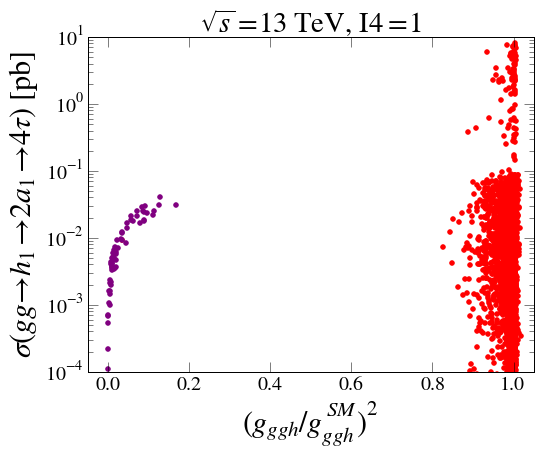

In [56]:
plot_many_scatters_compare(varx="h1ggrc2", vary="xsec_h1_2a1_4tau", 
                           dfs=df_h, title=r"$\sqrt{s} = 13\ \mathrm{TeV},\ \mathrm{I4 = 1}$", 
                           labels=labels_h, 
                           xlabel=r"$(g_{ggh}/g_{ggh}^{SM})^2$", 
                           ylabel=r"$\sigma(gg \to h_1 \to 2a_1 \to 4\tau)\ \mathrm{[pb]}$", 
                           colors=colors_h)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8,6)
ax = fig.get_axes()
plt.ylim([0.0001,10])
plt.xlim([-0.05, 1.05])
plt.yscale('log')
# fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

As a function of $m_{h_1}$, for both I4 settings (blue: I4 = 1, green: I4 = 0) since we are curious about whether the higgs mass changes anything:

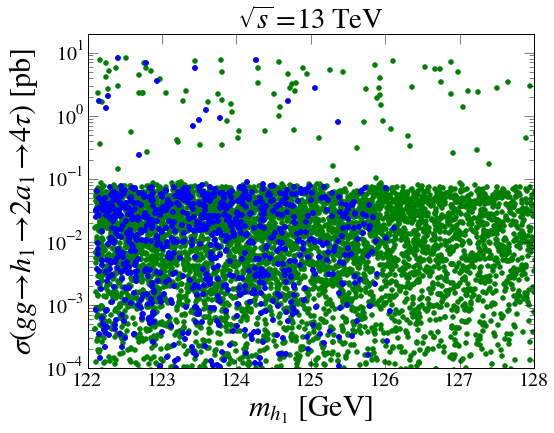

In [59]:
plot_many_scatters_compare(varx="mh1", vary="xsec_h1_2a1_4tau", 
                           dfs=dfs_pass, title=r"$\sqrt{s} = 13\ \mathrm{TeV}$", 
                           labels=labels_pass, 
                           xlabel=r"$m_{h_1}\ \mathrm{[GeV]}$", 
                           ylabel=r"$\sigma(gg \to h_1 \to 2a_1 \to 4\tau)\ \mathrm{[pb]}$", 
                           colors=colors_pass)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8,6)
ax = fig.get_axes()
plt.ylim([0.0001,20])
plt.xlim([122, 128])
# ax[0].set_xlim([-0.05, 1.05])
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

And as a function of $m_{a_{1}}$:

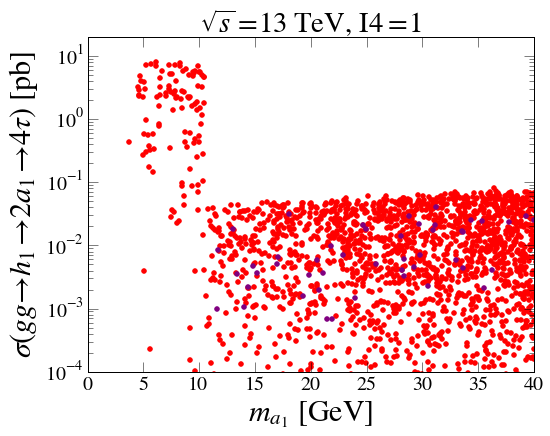

In [62]:
plot_many_scatters_compare(varx="ma1", vary="xsec_h1_2a1_4tau", dfs=df_h, 
                           title=r"$\sqrt{s} = 13\ \mathrm{TeV},\ \mathrm{I4 = 1}$", 
                           labels=labels_h, 
                           xlabel=r"$m_{a_1}\ \mathrm{[GeV]}$", 
                           ylabel=r"$\sigma(gg \to h_1 \to 2a_1 \to 4\tau)\ \mathrm{[pb]}$", 
                           colors=colors_h)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8,6)
ax = fig.get_axes()
ax[0].set_ylim([0.0001,20])
ax[0].set_xlim([0, 40])
ax[0].set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

So we can see that here, it is easy to acheive a cross-section fo a few pb, even up to 10 pb.

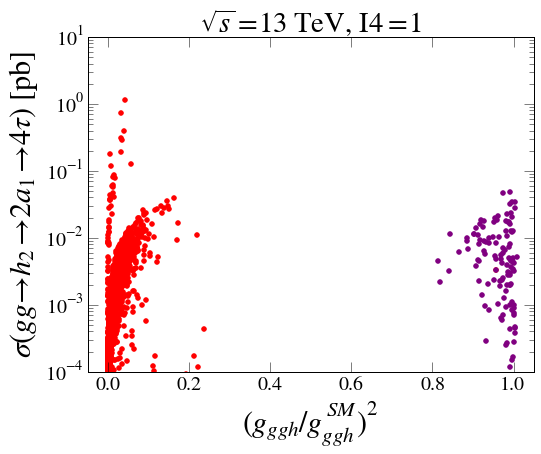

In [63]:
plot_many_scatters_compare(varx="h2ggrc2", vary="xsec_h2_2a1_4tau", 
                           dfs=df_h, title=r"$\sqrt{s} = 13\ \mathrm{TeV},\ \mathrm{I4 = 1}$", 
                           labels=labels_h, 
                           xlabel=r"$(g_{ggh}/g_{ggh}^{SM})^2$", 
                           ylabel=r"$\sigma(gg \to h_2 \to 2a_1 \to 4\tau)\ \mathrm{[pb]}$", 
                           colors=colors_h)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8,6)
ax = fig.get_axes()
ax[0].set_ylim([0.0001,10])
ax[0].set_xlim([-0.05,1.05])
ax[0].set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

Here, the cross-section is much more supressed. Interestingly, whilst the majority of points have $\sigma \sim 1E-3 $ pb, there is a small number with $\sigma \sim 0.1$ pb in the case where $h_1 = h(125)$ and where $h_2 \sim 140 - 320$ GeV. Further investigation show that these points are for low masses of $a_1$ (as expected), thereby imparting a very large boost to the di-tau systems (since $h_2$ is several hundred GeV at least)

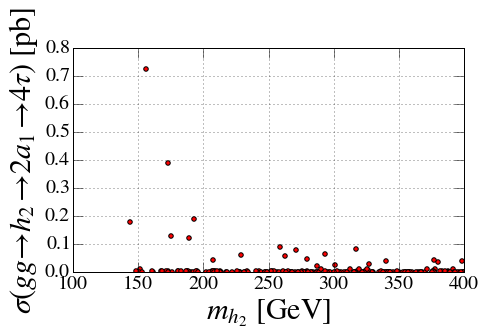

In [64]:
df_M3MU3MQ3AU3_h1SM[df_M3MU3MQ3AU3_h1SM.xsec_h1_2a1_4tau>0.05].plot(kind='scatter', x='mh2', y='xsec_h2_2a1_4tau', c='red')
# plt.yscale('log')
plt.xlim(100,400)
plt.xlabel(r"$m_{h_2}\ \mathrm{[GeV]}$")
plt.ylim(0,0.8)
plt.ylabel(r"$\sigma(gg \to h_2 \to 2a_1 \to 4\tau)\ \mathrm{[pb]}$")

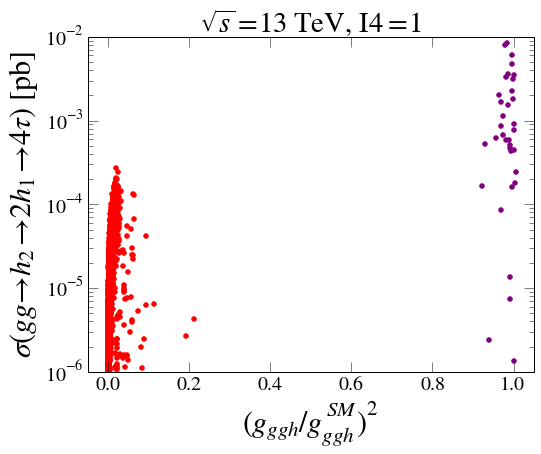

In [66]:
plot_many_scatters_compare(varx="h2ggrc2", vary="xsec_h2_2h1_4tau", 
                           dfs=df_h, title=r"$\sqrt{s} = 13\ \mathrm{TeV},\ \mathrm{I4 = 1}$", 
                           labels=labels_h, 
                           xlabel=r"$(g_{ggh}/g_{ggh}^{SM})^2$", 
                           ylabel=r"$\sigma(gg \to h_2 \to 2h_1 \to 4\tau)\ \mathrm{[pb]}$", 
                           colors=colors_h)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8,6)
ax = fig.get_axes()
ax[0].set_ylim([0.000001,0.01])
ax[0].set_xlim([-0.05,1.05])
ax[0].set_yscale('log')

Here the cross-section is as we expected, around 1E-3 pb for the scenario $h_2 = h(125)$.

Let's also look at the most promising scenario as a function of input parameters, to see if a correlation exists. Answer = not really - only interesting ones are $A_{\kappa} \sim 0$ and $\kappa < 0.3$, which presumably give the low mass $a_1$

[None, None, None, None, None, None]

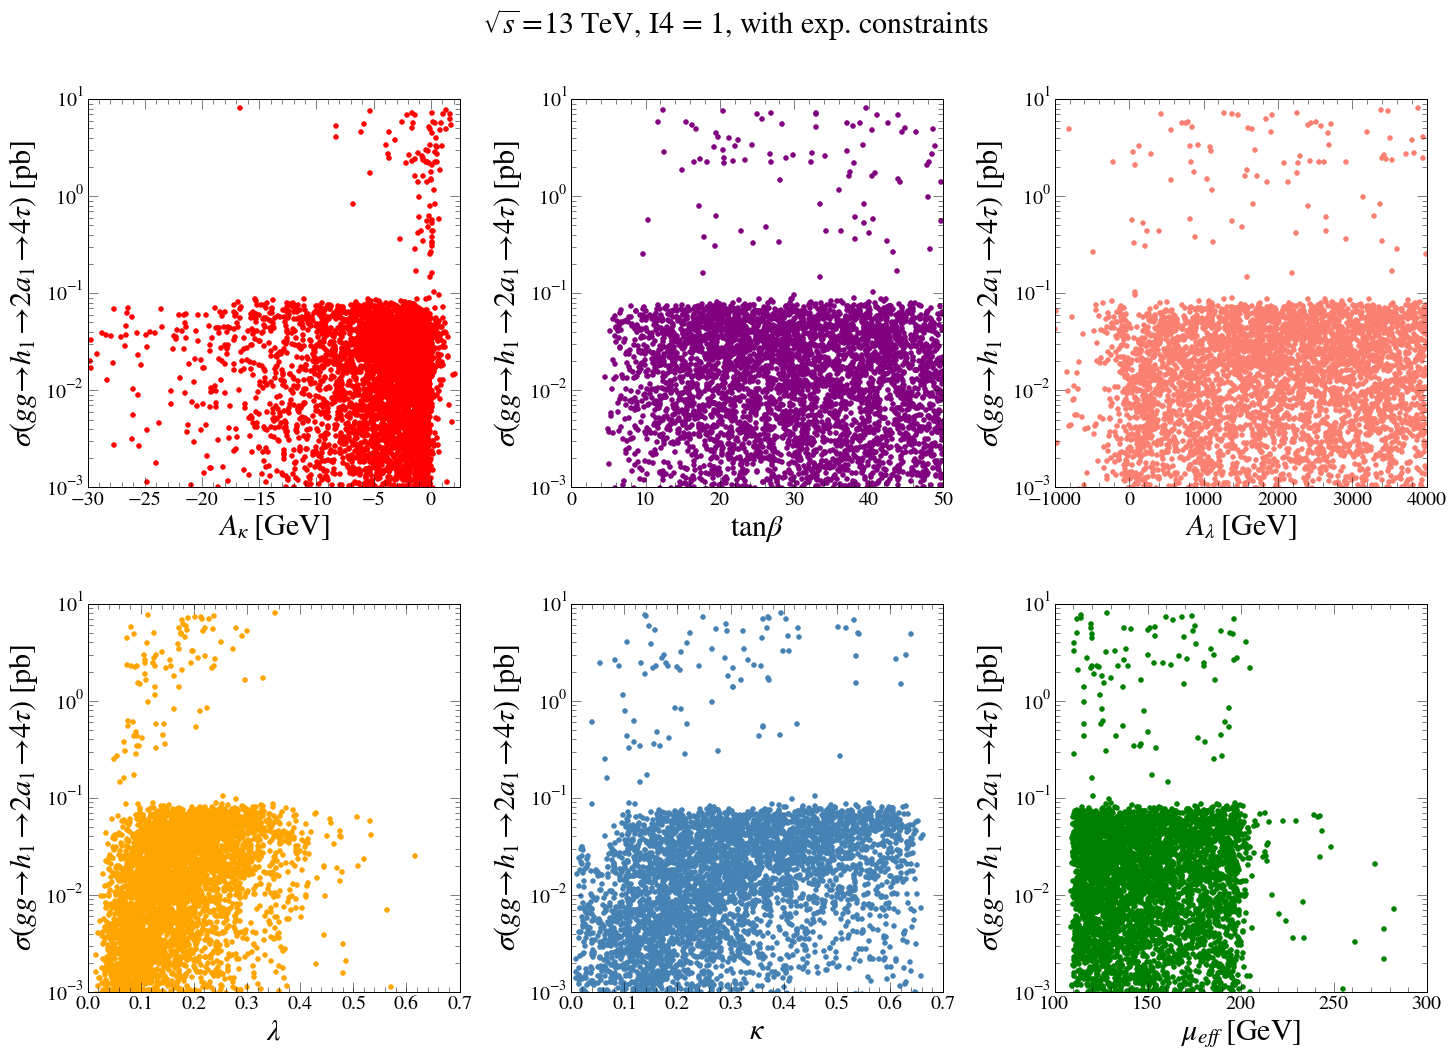

In [67]:
plot_input_params_scatters(df_M3MU3MQ3AU3_pass_all, yvar="xsec_h1_2a1_4tau", 
                           ylabel=r"$\sigma(gg \to h_1 \to 2a_1 \to 4\tau)\ \mathrm{[pb]}$", 
                           yrange=[0.001, 10], title=r"$\sqrt{s} = 13\ \mathrm{TeV}$, I4 = 1, with exp. constraints")
axes = plt.gcf().get_axes()
[ax.set_yscale('log') for ax in axes]